In [4]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [5]:
#Print the data types
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
# Get the shapes of the data
print('x_train shape:', x_train.shape)
print('x_train shape:', y_train.shape)
print('x_train shape:', x_test.shape)
print('x_train shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
x_train shape: (50000, 1)
x_train shape: (10000, 32, 32, 3)
x_train shape: (10000, 1)


In [7]:
#Look into the first image in the training data set
x_train[0] #the response is a series of pixel values: black wave lenght, grey wave lenght, blue wave lenght

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

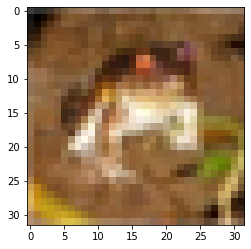

In [8]:
# Show the picture
import matplotlib.pyplot as plt
img = plt.imshow(x_train[0])

In [9]:
# Label of the image
print("Label:", y_train[0]) #each value correponds to a value; 6 correponds to "frog"

Label: [6]


In [10]:
#One-Hot Encoding: Convert the labels into a set of 10 numbers to input into the neural network
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#Print the new lavels in the training data set
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
# Example of the new labels
print("The one hot label is:", y_train_one_hot[0]) #The number "1" position will correspond to the number we foud previously for the label

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
#Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [13]:
# Build the CNN (Convolutional Neural Networks)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#Create the architecture
model = Sequential()

#Convolution layer
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3))) #'input_shape' because this is the first layer

#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2))) # 2 by 2 filter/image reduction rate

#Convolution layer
model.add( Conv2D(32, (5,5), activation='relu',))

#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer
model.add( Flatten()) #one-directional array

#Create Neural Networks
model.add( Dense(1000, activation='relu'))
model.add( Dense(10, activation='softmax')) #number of neurons = number of labels

In [14]:
#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
#Train the model
hist = model.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.3)#batch_size is the number of training examples
#epochs is the number of iterations when the entire dataset is passforward and backward through the CNN
#validation_split number is the number of dataset that is actually used; in this case we have 70% of out data being used only for training

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 35000 samples, validate on 15000 samples
Epoch 1/10





35000/35000 [==============================] - 51s 1ms/step - loss: 1.6979 - acc: 0.3867 - val_loss: 1.4527 - val_acc: 0.4761
Epoch 2/10
35000/35000 [==============================] - 50s 1ms/step - loss: 1.3676 - acc: 0.5122 - val_loss: 1.2788 - val_acc: 0.5457
Epoch 3/10
35000/35000 [==============================] - 51s 1ms/step - loss: 1.2187 - acc: 0.5649 - val_loss: 1.2659 - val_acc: 0.5424
Epoch 4/10
35000/35000 [==============================] - 50s 1ms/step - loss: 1.1172 - acc: 0.6048 - val_loss: 1.1445 - val_acc: 0.5921
Epoch 5/10
35000/35000 [==============================] - 50s 1ms/step - loss: 1.0268 - acc: 0.6407 - val_loss: 1.0940 - val_acc: 0.6175
Epoch 6/10
35000/35000 [==============================] - 50s 1ms/step - loss: 0.9548 - acc: 0.6667 - val_loss: 1.0996 - val_acc: 0.6196
Epoch 7/10
35000/35000 [==

In [16]:
# Models accuracy
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 5s 459us/step


0.6593

<function matplotlib.pyplot.show>

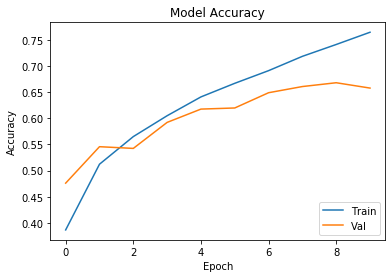

In [17]:
# Visualiz the models accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show

<function matplotlib.pyplot.show>

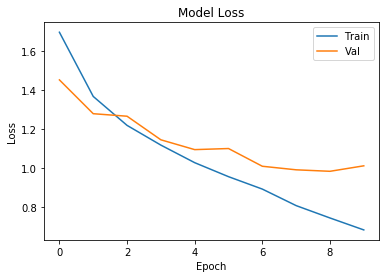

In [18]:
# Visualiz the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show

In [35]:
#Load the cat image data
from google.colab import files
uploaded = files.upload()
my_image = plt.imread('cat.jpg')

Saving cat.jpg to cat (2).jpg


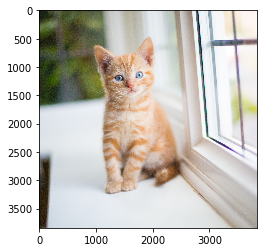

In [36]:
# Show the uploaded cat image
img = plt.imshow(my_image)

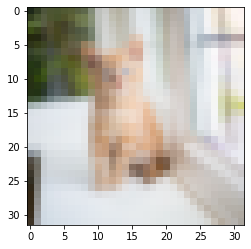

In [38]:
# Resize the image
from skimage.transform import resize
my_image_resized = resize(my_image, (32, 32, 3))
img = plt.imshow(my_image_resized)

In [39]:
#Get the probabilities for each class
import numpy as np
probabilities = model.predict(np.array([my_image_resized,])) #will predictive what the image is
probabilities #the highest probabiities indicate the changes of the image being one of the classes

array([[1.2233931e-03, 6.2439675e-08, 2.6482358e-03, 2.3024888e-01,
        6.1364812e-03, 7.5248545e-01, 5.7428650e-04, 6.3077551e-03,
        3.5053724e-04, 2.4862609e-05]], dtype=float32)

In [40]:
# Transforming the numbers to classes
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:]) #sorting the probabilities in ascending order
print('Most likely class: ', number_to_class[index[9]], '--probability:', probabilities[0, index[9]])
print('Second most likely class: ', number_to_class[index[8]], '--probability:', probabilities[0, index[8]])

Most likely class:  dog --probability: 0.75248545
Second most likely class:  cat --probability: 0.23024888


In [42]:
#Load the dog image data
from google.colab import files
uploaded = files.upload()
my_dog_image = plt.imread('dog.jpg')

Saving dog.jpg to dog.jpg


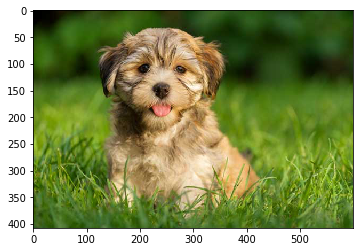

In [44]:
#Show the uploaded dog image
dog_img = plt.imshow(my_dog_image)

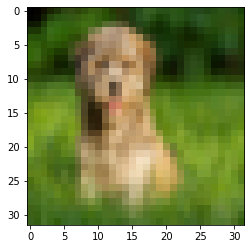

In [45]:
# Resize the image
from skimage.transform import resize
my_dog_image_resized = resize(my_dog_image, (32, 32, 3))
dog_img = plt.imshow(my_dog_image_resized)

In [46]:
#Get the probabilities for each class
import numpy as np
dog_probabilities = model.predict(np.array([my_dog_image_resized,])) #will predictive what the image is
dog_probabilities #the highest probabiities indicate the changes of the image being one of the classes

array([[1.8499546e-04, 8.4270465e-07, 3.7684333e-01, 4.6927609e-02,
        7.8951739e-02, 4.7641891e-01, 2.0372655e-02, 2.9293669e-04,
        6.1711976e-06, 7.2546538e-07]], dtype=float32)

In [47]:
# Transforming the numbers to classes
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(dog_probabilities[0,:]) #sorting the probabilities in ascending order
print('Most likely class: ', number_to_class[index[9]], '--probability:', probabilities[0, index[9]])
print('Second most likely class: ', number_to_class[index[8]], '--probability:', probabilities[0, index[8]])

Most likely class:  dog --probability: 0.75248545
Second most likely class:  bird --probability: 0.0026482358


In [0]:
#Save the model
model.save('my_image_classifying_model.h5')

In [0]:
#Load the model
from keras.models import load_model
model = load_model('my_image_classifying_model.h5')